In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

X = load_iris().data
y = load_iris().target

feature_names = load_iris().feature_names
target_names = load_iris().target_names

print(X.shape)
print(y.shape)

print(feature_names)
print("------")
print(target_names)

df = pd.DataFrame(X, columns=feature_names)
df['target'] = [target_names[i] for i in y]
print(df.shape)
print(df.columns)


(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
------
['setosa' 'versicolor' 'virginica']
(150, 5)
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [23]:
def lda_plot(X, y, class_labels, title):
    lda = LinearDiscriminantAnalysis(n_components=1)
    X_lda = lda.fit_transform(X, y)
    
    df_lda = pd.DataFrame({"X": X_lda.flatten(), "Y": class_labels})

    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df_lda, x="X", hue="Y", fill=True, alpha=0.4)
    plt.scatter(
        X_lda, np.zeros_like(X_lda) - 0.01, 
        c=['blue' if label == class_labels[0] else 'red' for label in class_labels], 
        alpha=0.6, edgecolors="black", marker="o", s=40  # Changed marker from "|" to "o"
    )

    plt.title(title)
    plt.xlabel("LDA 1D Projection")
    plt.ylabel("Density")
    plt.show()
    


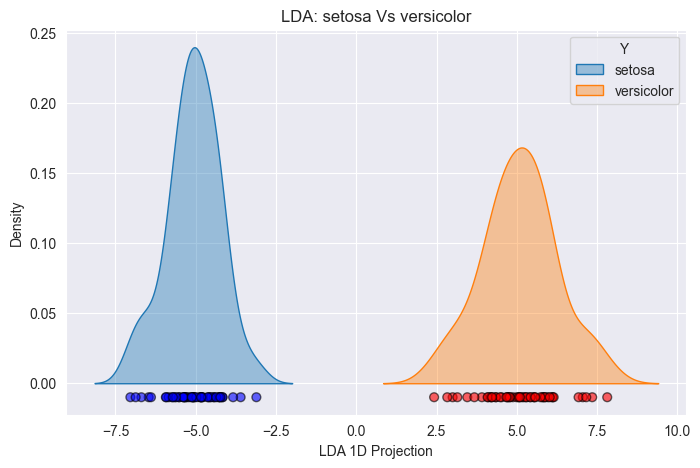

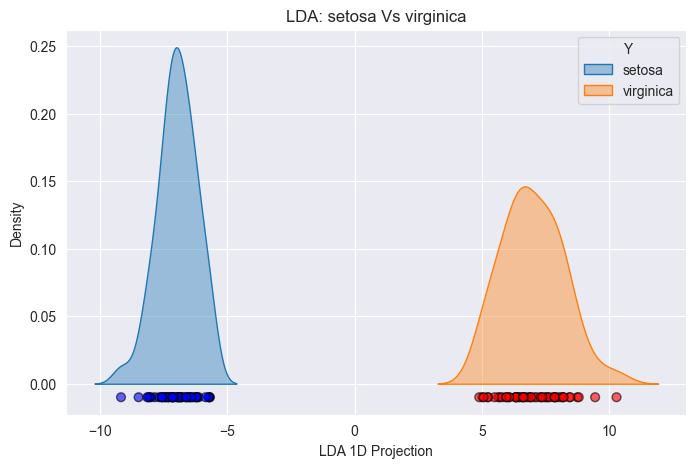

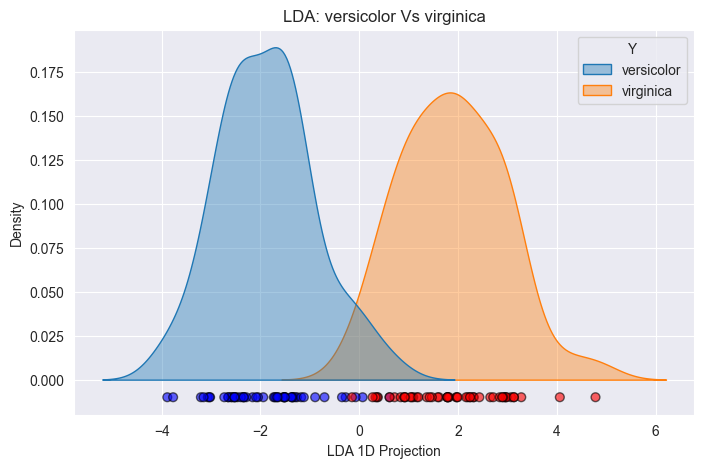

In [24]:
import itertools
class_list = [(str(a), str(b)) for a, b in itertools.combinations(target_names, 2)]

for name in class_list:
    class_id = []
    class_id.append(np.where(target_names == name[0])[0][0])
    class_id.append(np.where(target_names == name[1])[0][0])
    mask = np.isin(y, class_id)
    lda_plot(X[mask], y[mask], [target_names[i] for i in y[mask]], f'LDA: {name[0]} Vs {name[1]}')
    

(300,)
(300, 1)


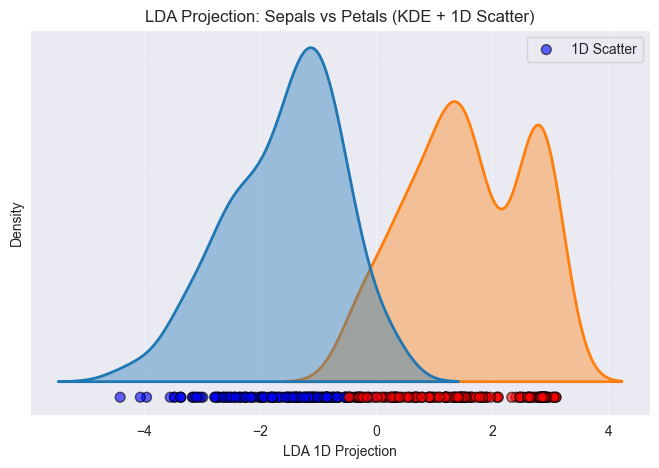

In [18]:
#comfuse about this assignment

sepal_features = X[:, :2]
petal_features = X[:, 2:]

# print(sepal_features.shape)
# print(petal_features.shape)

# Step 2: Create Combined Dataset
sepal_petal_labels = np.array(["Sepals"] * len(sepal_features) + ["Petals"] * len(petal_features))

print(sepal_petal_labels.shape)


X_combined = np.vstack((sepal_features, petal_features))  # Combine feature matrices

# print(X_combined.shape)
# print(X_combined)

y_combined = np.hstack((np.zeros(len(sepal_features)), np.ones(len(petal_features))))  # 0 for Sepals, 1 for Petals

# print(y_combined.shape)
# print(y_combined.shape)

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_combined, y_combined)

print(X_lda.shape)

df_combined = pd.DataFrame({"X": X_lda.flatten(), "Y": sepal_petal_labels})

# **Plot KDE and Scatter Plot Together**
plt.figure(figsize=(8, 5))

# KDE Plot
sns.kdeplot(data=df_combined, x="X", hue="Y", fill=True, alpha=0.4, linewidth=2)

# Scatter Plot (1D representation)
plt.scatter(
    X_lda, np.zeros_like(X_lda) - 0.01, 
    c=['blue' if label == "Sepals" else 'red' for label in sepal_petal_labels], 
    alpha=0.6, edgecolors="black", label="1D Scatter", marker="o", s=50
)


plt.xlabel("LDA 1D Projection")
plt.yticks([])  # Remove y-axis for 1D effect
plt.title("LDA Projection: Sepals vs Petals (KDE + 1D Scatter)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()
